In [2]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

alpha = 0.05
a = 3
b = 3
n = 3

x = pd.read_csv('Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Pressure','Temperature','Yield'])
print(df.head())

# Do the two-way ANOVA
model = ols('Yield~ C(Pressure) + C(Temperature) + C(Pressure):C(Temperature)',df).fit()
anova_results = round(anova_lm(model), 4)
print(anova_results, 4)

if anova_results['PR(>F)'][0] < 0.05:
    print('\nFor material, p-value: %f < 0.05, reject H01.'% anova_results['PR(>F)'][0])
else:
    print('\nFor material, accept H01.')

if anova_results['PR(>F)'][1] < 0.05:
    print('\nFor temperature, p-value: %f < 0.05, reject H02.'% anova_results['PR(>F)'][1])
else:
    print('\nFor temperature, accept H02.')
    
if anova_results['PR(>F)'][2] < 0.05:
    print('\nFor material:temp, p-value: %f < 0.05, reject H03.'% anova_results['PR(>F)'][2])
else:
    print('\nFor material:temp, accept H03.')

   Pressure  Temperature  Yield
0         1          100    580
1         1          100    568
2         1          100    570
3         2          100    550
4         2          100    530
                              df        sum_sq      mean_sq          F  PR(>F)
C(Pressure)                  2.0  1.508645e+05   75432.2593   206.3706     0.0
C(Temperature)               2.0  1.970335e+06  985167.2593  2695.2595     0.0
C(Pressure):C(Temperature)   4.0  2.905517e+05   72637.9259   198.7257     0.0
Residual                    18.0  6.579333e+03     365.5185        NaN     NaN 4

For material, p-value: 0.000000 < 0.05, reject H01.

For temperature, p-value: 0.000000 < 0.05, reject H02.

For material:temp, p-value: 0.000000 < 0.05, reject H03.


固定温度水平为 160°C: 三种材料之间的多重比较: 
    Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2     -73.0 0.0017 -108.1909  -37.8091   True
     1      3 -499.3333  0.001 -534.5242 -464.1424   True
     2      3 -426.3333  0.001 -461.5242 -391.1424   True
---------------------------------------------------------




D:\Program_Files\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


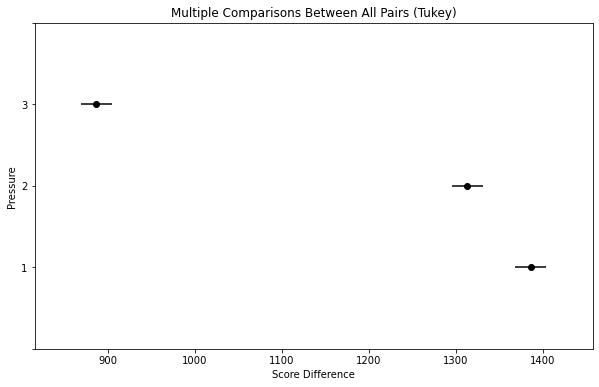

In [3]:
# 使用Tukey HSD 检验法进行多重比较
multiComp = MultiComparison(df.loc[df['Temperature'] == 150, 'Yield'], df.loc[df['Temperature'] == 150, 'Pressure'])
# multiComp = MultiComparison(df['Yield'], df['Pressure'])

tukey = multiComp.tukeyhsd()
print('固定温度水平为 160°C: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= "Pressure", xlabel= "Score Difference")
print('\n')

In [4]:
# 计算收率数据的残差
list_temp = [100, 125, 150]
data_res = data.astype(float)
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i + 1) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
df = pd.DataFrame(data_res, columns = ['Pressure', 'Temperature', 'Yield_res'])
print(df.head())

   Pressure  Temperature  Yield_res
0       1.0        100.0   7.333333
1       1.0        100.0  -4.666667
2       1.0        100.0  -2.666667
3       2.0        100.0  -3.000000
4       2.0        100.0 -23.000000


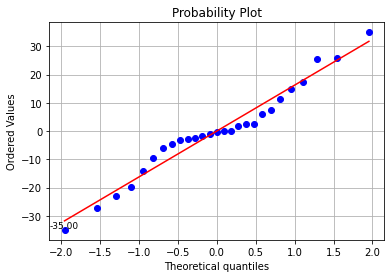

In [5]:
# 残差的正态概率图
res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

In [6]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal, 2))

if pVal > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

0.97
0.52

Accept the null hypothesis.


In [7]:
# 用Durbin-Watson检验进行独立性检验
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno
dw = durbin_watson(res)
print('Durbin-Watson检验的统计量为：', round(dw,2))

Durbin-Watson检验的统计量为： 2.27


[572.6666666666666, 572.6666666666666, 572.6666666666666, 553.0, 553.0, 553.0, 573.3333333333334, 573.3333333333334, 573.3333333333334, 1087.3333333333333, 1087.3333333333333, 1087.3333333333333, 1035.0, 1035.0, 1035.0, 1054.6666666666667, 1054.6666666666667, 1054.6666666666667, 1386.0, 1386.0, 1386.0, 1313.0, 1313.0, 1313.0, 886.6666666666666, 886.6666666666666, 886.6666666666666]


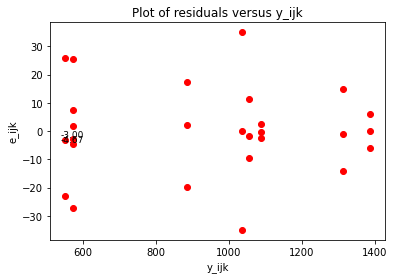

In [24]:
# 残差与预测值的关系图
y2 = []
for j in list_temp:
    for i in range(a):
        for k in range(n):
            y2.append(np.mean(data[(data[:,0] == i + 1) & (data[:,1] == j), 2]))
plt.scatter(y2, res, c = 'red')
plt.text(y2[0], res[1], '%.2f' % float(res[1]), ha='center', va= 'bottom', fontsize=9)
plt.text(y2[0], res[3], '%.2f' % float(res[3]), ha='center', va= 'bottom', fontsize=9)
plt.title('Plot of residuals versus y_ijk')
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')
print(y2)

Text(0, 0.5, 'e_ijk')

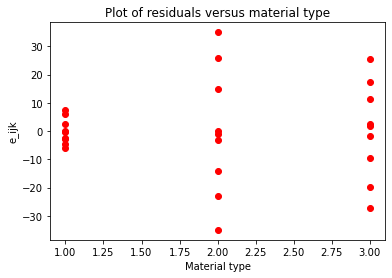

In [9]:
# 残差对材料种类的关系图
y3 = data_res[:,0]
plt.scatter(y3, res, c = 'red')
plt.title('Plot of residuals versus material type')
plt.xlabel('Material type')
plt.ylabel('e_ijk')

Text(0, 0.5, 'e_ijk')

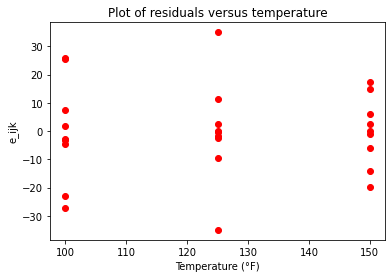

In [10]:
# 残差对温度的关系图
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'red')
plt.title('Plot of residuals versus temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

   Pressure  Temperature    Yield_avg
0       1.0        100.0   572.666667
1       1.0        100.0   572.666667
2       1.0        100.0   572.666667
3       2.0        100.0   553.000000
4       2.0        100.0   553.000000
5       2.0        100.0   553.000000
6       3.0        100.0   573.333333
7       3.0        100.0   573.333333
8       3.0        100.0   573.333333
9       1.0        125.0  1087.333333


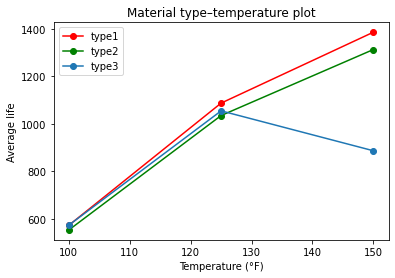

In [22]:
# 固定效应模型分析
data_avg = data.astype(float) * 1
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i + 1) & (data_avg[:,1] == j),2] = np.mean(cnt)
df = pd.DataFrame(data_avg, columns = ['Pressure', 'Temperature', 'Yield_avg'])
print(df.head(10))

type1 = data_avg[[0,9,18], 2]
type2 = data_avg[[3,12,21], 2]
type3 = data_avg[[6,15,24], 2]
c1 = pd.Series(type1, index = list_temp, name = 'type1')
c2 = pd.Series(type2, index = list_temp, name = 'type2')
c3 = pd.Series(type3, index = list_temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'type3')
plt.title('Material type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average life')
plt.legend(['type1', 'type2', 'type3'])

In [23]:
# 参数估计
mu = np.mean(data[:,2])
print('总平均效应：', round(mu, 2))

tau = []
for i in range(a):
    tau.append(np.mean(data[data[:,0] == i + 1, 2]) - mu)
print('材料因子的水平效应：\n', np.round(tau, 2))

beta = []
for j in list_temp:
    beta.append(np.mean(data[data[:,1] == j, 2]) - mu)
print('温度因子的水平效应：\n', np.round(beta, 2))

tau_beta = []
k = 0
for i in range(a):
    tau_beta.append([])
    for j in range(b):
        cnt = data_avg[0 + 3 * k, 2] - tau[j] - beta[i] + mu
        tau_beta[i].append(cnt)
        k += 1
print('两因子之间的交互作用效应：\n', np.round(tau_beta, 2))



总平均效应： 940.19
材料因子的水平效应：
 [  75.15   26.81 -101.96]
温度因子的水平效应：
 [-373.85  118.81  255.04]
两因子之间的交互作用效应：
 [[1811.56 1840.22 1989.33]
 [1833.56 1829.56 1978.  ]
 [1996.   1971.33 1673.78]]


In [17]:
# 构造这 8 个变量
# list_A = [100, 125, 150]
list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]
A = data[:,1] * 1
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]
AA = [A[k] ** 2 for k in range(len(A))]
AB1 = [A[k] * B1[k] for k in range(len(A))]
AB2 = [A[k] * B2[k] for k in range(len(A))]
AAB1 = [AA[k] * B1[k] for k in range(len(A))]
AAB2 = [AA[k] * B2[k] for k in range(len(A))]
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Life'] = data[:,2]
print(df.head())

# 训练模型
model = ols('Life~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params
print(param[1])
model.summary()

   A  B1  B2  AA  AB1  AB2  AAB1  AAB2  Life
0 -1   1   0   1   -1    0     1     0   580
1 -1   1   0   1   -1    0     1     0   568
2 -1   1   0   1   -1    0     1     0   570
3 -1   0   1   1    0   -1     0     1   550
4 -1   0   1   1    0   -1     0     1   530
314.44444444444457


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Life   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Mon, 22 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        21:46:45   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1059.0000      6.373    166.174      0.000    1045.611    1072.389
A            314.4444      4.506     69.779      0.000     304.977     323.912
B1            28.3333      9.013      3.144      0.006       9.399      47.268
B2           -24.0000      9.013     -2.663      0.016     -42.935      -5.065
AA          -178.2222      7.805    -22.834      0.000    -194.620    -161.824
AB1           92.2222      6.373     14.471      0.000      78.833     105.611
AB2           65.5556      6.373     10.287      0.000      52.167      78.944
AAB1          70.2222     11.038      6.362      0.000      47.032      93.412
AAB2          76.2222     11.038      6.905      0.000      53.032      99.412
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                         5.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

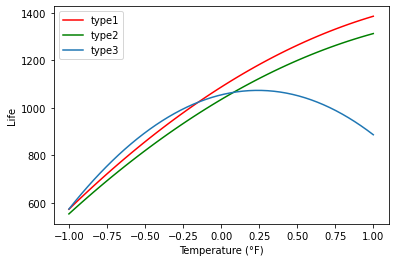

In [18]:
# 拟合响应曲线
temp = np.linspace(-1,1)
life_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
life_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
life_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]

c1 = pd.Series(life_type1, index = temp, name = 'type1')
c2 = pd.Series(life_type2, index = temp, name = 'type2')
c3 = pd.Series(life_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature (°F)')
plt.ylabel('Life')
plt.legend(['type1', 'type2', 'type3'])